In [209]:
import pandas as pd
import numpy as np
import math
import seaborn as sb
import matplotlib.pyplot as plt

In [128]:
annual_rate = 0.039
monthly_rate = ((1+annual_rate)**(1/12))-1

total_invested = 10000

max_monthly_investment = 3000

In [19]:
def amortise(principal, rate, repayment):
    remaining = principal
    months = 0
    interest_paid = 0
    while remaining > 0:
        if remaining < repayment:
            principal_paid = repayment - remaining
            remaining = remaining - principal_paid
            months = months + 1
        else:
            interest_paid = interest_paid + remaining*monthly_rate
            principal_paid = repayment - remaining*monthly_rate
            remaining = remaining - principal_paid
            months = months + 1
            
    amortisation_output = {}
    for variable in ["months", "interest_paid"]:
        amortisation_output[variable] = eval(variable)
    
    return amortisation_output

print(amortise(total_invested, monthly_rate, max_monthly_investment))
        
    

{'months': 4, 'interest_paid': 67.33524142885662}


In [38]:
def random_returns(months):
    mean_return = 0.07/12
    sd_return = ((1+0.1689)**(1/12))-1
    
    returns = np.random.normal(loc=mean_return, scale=sd_return, size=months)
    
    return returns

print(random_returns(4))
        

[0.01065658 0.00372688 0.01368757 0.02183577]


In [132]:
def equity_builder(invested_amount):
    months = amortise(invested_amount, monthly_rate, max_monthly_investment)['months']
    interest_paid = amortise(invested_amount, monthly_rate, max_monthly_investment)['interest_paid']
    returns = random_returns(months)
    revenue = sum(returns*invested_amount)
    profit = revenue - interest_paid
    
    equity_builder_output = {}
    for variable in ["months", "profit"]:
        equity_builder_output[variable] = eval(variable)
    
    return equity_builder_output

equity_builder(total_invested)
    

{'months': 4, 'profit': 486.3658578595963}

In [141]:
def no_LVR(invested_amount):
    months = math.ceil(invested_amount/max_monthly_investment)
    returns = random_returns(months)
    month_list = np.array(range(1, months+1))
    profit = (invested_amount/months)*sum(returns*month_list)
    
    no_LVR_output = {}
    for variable in ["months", "profit"]:
        no_LVR_output[variable] = eval(variable)
    
    return no_LVR_output

print(no_LVR(total_invested))

{'months': 4, 'profit': 66.81974828715362}


In [153]:
def compare(invested_amount):
    months_eb = amortise(invested_amount, monthly_rate, max_monthly_investment)['months']
    months_noLVR = math.ceil(invested_amount/max_monthly_investment)
    months = max(months_eb, months_noLVR)
    
    returns = random_returns(months)
    
    # equity builder
    interest_paid = amortise(invested_amount, monthly_rate, max_monthly_investment)['interest_paid']
    revenue_eb = sum(returns[:months]*invested_amount)
    profit_eb = revenue_eb - interest_paid
    
    # no LVR
    month_list = np.array(range(1, months+1))
    profit_noLVR = (invested_amount/months)*sum(returns[:months]*month_list)
    
    compare_output = {}
    for variable in ["months", "returns", "profit_eb", "profit_noLVR"]:
        compare_output[variable] = eval(variable)
    
    return compare_output

print(compare(total_invested))
    
    
    

{'months': 4, 'returns': array([0.00217982, 0.0096164 , 0.01229094, 0.00087927]), 'profit_eb': 182.32903396516832, 'profit_noLVR': 154.5062706857883}


In [196]:
def monte_carlo(invested_amount, draws):
    results = pd.DataFrame(columns = ["Invested", "Equity_Builder", "No_LVR"])
    
    for sim in range(0,draws):
        Invested = invested_amount
        comp = compare(invested_amount)
        Equity_Builder = comp['profit_eb']
        No_LVR = comp['profit_noLVR']
        sim_output = {}
        for variable in ["Invested", "Equity_Builder", "No_LVR"]:
            sim_output[variable] = eval(variable)
        
        sim_output = pd.DataFrame([sim_output])
        results = results.append(sim_output, sort=False)
    
    results.reset_index(drop=False, inplace=True)
        
    return(results)

sim = monte_carlo(total_invested, draws=1000)
print("Expected profit, Equity Builder: " + str(np.average(sim['Equity_Builder'])))
print("Expected profit, No Leverage: " + str(np.average(sim['No_LVR'])))

Expected profit, Equity Builder: 160.47993899790907
Expected profit, No Leverage: 143.5435648134701


In [340]:
def visualise_MC(total_invested, draws):
    sim = monte_carlo(total_invested, draws)
    index = sim.index
    eb = sim['Equity_Builder']
    nL = sim['No_LVR']
    ratio = eb/nL #when ratio > 1, eb profits > nL profits

    fig, ax = plt.subplots(figsize=(12,8))
    sb.distplot(eb, bins=100, label="Equity Builder")
    sb.distplot(nL, bins=100, label="No Leverage", axlabel="Profit ($)")
    ax.legend()
    plt.show()

    print("Expected profit, Equity Builder: $" + str(np.around(np.average(eb),2)))
    print("Standard deviation, Equity Builder: $" + str(np.around(np.std(eb),2)))
    print("")
    
    print("Expected profit, No LVR: $" + str(np.around(np.average(nL),2)))
    print("Standard deviation, No LVR: $" + str(np.around(np.std(nL),2)))
    print("")

    print("% difference in expected profit: "
          +str(np.around(100*((np.average(eb)/np.average(nL))-1),2))+"%")
    print("% difference in standard deviation: "
          +str(np.around(100*((np.std(eb)/np.std(nL))-1),2))+"%")
    
    print("")
    print("Worst case, Equity Builder: " +str(np.around(min(eb),2)))
    print("Worst case, No Leverage: "+str(np.around(min(nL),2)))
    
    print("")
    print("Best case, Equity Builder: " +str(np.around(max(eb),2)))
    print("Best case, No Leverage: "+str(np.around(max(nL),2)))

Months: 6


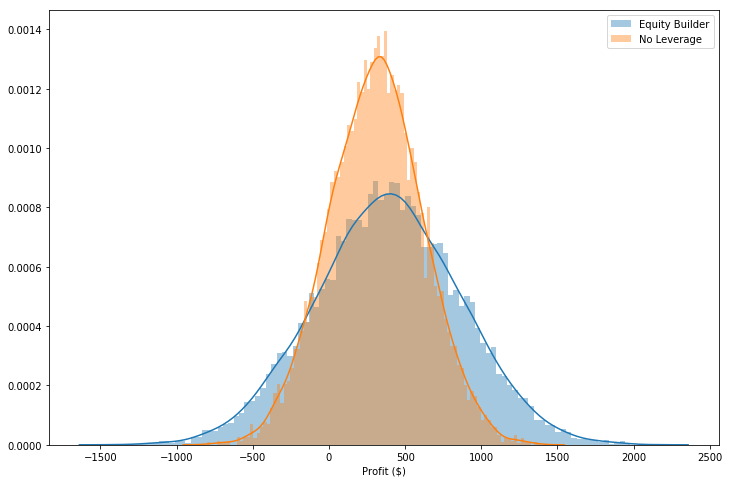

Expected profit, Equity Builder: $386.73
Standard deviation, Equity Builder: $476.41

Expected profit, No LVR: $309.08
Standard deviation, No LVR: $307.81

% difference in expected profit: 25.12%
% difference in standard deviation: 54.77%

Worst case, Equity Builder: -1399.65
Worst case, No Leverage: -802.65

Best case, Equity Builder: 2118.82
Best case, No Leverage: 1389.35


In [341]:
print("Months: "+str(equity_builder(15000)['months']))
visualise_MC(total_invested=15000, draws=10000)
